# Chapter 4: Representing Data and Engineering Features

In real-world applications, data is not always numeric. We often deal with **categorical (discrete)** features like color, department, or job title.

**Key concepts:**
- **Continuous features** = numeric (e.g., age, hours)
- **Categorical features** = non-numeric (e.g., gender, education)
- Machine learning models require numerical inputs → we must encode categorical data
- Feature representation and transformation directly affect model performance


In [2]:
# Imports and setup for data processing and modeling
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split



## Dataset Example: U.S. Adult Income Census (1994)

Goal: Predict if income is **>50K** or **<=50K**

**Features:**
- Continuous: age, hours-per-week
- Categorical: workclass, education, gender, occupation

These categorical columns must be converted to numeric format for modeling.


## One-Hot Encoding (Dummy Variables)

Categorical features are converted into binary columns:
- Example: `workclass = Private` becomes:
  - workclass_Private = 1
  - All other workclass_* columns = 0

We use `pd.get_dummies()` in pandas to achieve this.


In [3]:
# Load the dataset and select relevant columns
data = pd.read_csv(
    "adult.data.txt", header=None, index_col=False,
    names=['age', 'workclass', 'fnlwgt', 'education', 'education-num',
           'marital-status', 'occupation', 'relationship', 'race', 'gender',
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
           'income'])

# Select subset of columns
data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income']]

# One-hot encode categorical columns
data_dummies = pd.get_dummies(data)

# Separate features and target
X = data_dummies.loc[:, 'age':'occupation_ Transport-moving'].values
y = data_dummies['income_ >50K'].values


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split with scaled data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=0)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

print("Test accuracy: {:.2f}".format(logreg.score(X_test, y_test)))



Test accuracy: 0.81


In [6]:
# Create a DataFrame with both string and integer categorical data
demo_df = pd.DataFrame({
    'Integer Feature': [0, 1, 2, 1],
    'Categorical Feature': ['socks', 'fox', 'socks', 'box']
})
display(demo_df)

,Integer Feature,Categorical Feature
0,0,socks
1,1,fox
2,2,socks
3,1,box


In [7]:
# Automatically encodes only the string-based categorical column
encoded_df = pd.get_dummies(demo_df)
display(encoded_df)

,Integer Feature,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,0,False,False,True
1,1,False,True,False
2,2,False,False,True
3,1,True,False,False


In [8]:
# Convert the integer feature to string to treat it as categorical
demo_df['Integer Feature'] = demo_df['Integer Feature'].astype(str)
# Apply one-hot encoding to both columns explicitly
full_encoded_df = pd.get_dummies(demo_df, columns=['Integer Feature', 'Categorical Feature'])
display(full_encoded_df)

,Integer Feature_0,Integer Feature_1,Integer Feature_2,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,True,False,False,False,False,True
1,False,True,False,False,True,False
2,False,False,True,False,False,True
3,False,True,False,True,False,False


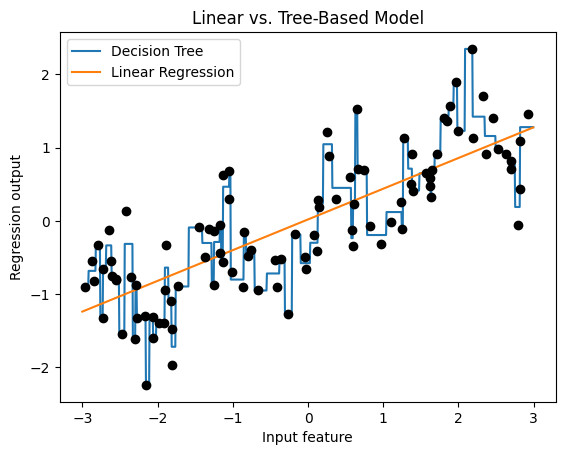

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt
import mglearn

# Create the dataset
X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

# Fit a Decision Tree Regressor
reg_tree = DecisionTreeRegressor(min_samples_split=3).fit(X, y)
plt.plot(line, reg_tree.predict(line), label="Decision Tree")

# Fit a Linear Regression model
reg_linear = LinearRegression().fit(X, y)
plt.plot(line, reg_linear.predict(line), label="Linear Regression")

# Plot original data
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")
plt.title("Linear vs. Tree-Based Model")
plt.show()